# Linear Regression Machine Learning Project for House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
train_data = X_train.join(Y_train)

In [15]:
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1446     -122.00     37.98                35.0       1192.0           201.0   
2860     -118.90     35.41                 6.0       4656.0           971.0   
14532    -117.13     32.94                15.0       4846.0           825.0   
19662    -120.85     37.50                52.0       1724.0           352.0   
16163    -122.50     37.77                52.0       1769.0           414.0   
...          ...       ...                 ...          ...             ...   
5089     -118.29     33.98                30.0       1162.0           318.0   
19562    -120.96     37.59                11.0       4236.0           879.0   
15133    -116.93     32.83                21.0       1283.0           278.0   
19799    -123.21     40.51                16.0        241.0            84.0   
3165     -118.85     35.20                17.0       2783.0           678.0   

       population  households  median_income ocean_proximity  \
1446        535.0       172.0         4.9219          INLAND   
2860       2320.0       935.0         3.0938          INLAND   
14532      2797.0       823.0         4.9375       <1H OCEAN   
19662       922.0       348.0         1.7227          INLAND   
16163      1032.0       380.0         3.9954        NEAR BAY   
...           ...         ...            ...             ...   
5089       1207.0       289.0         1.2230       <1H OCEAN   
19562      2410.0       850.0         2.3849          INLAND   
15133       684.0       289.0         2.3203       <1H OCEAN   
19799       152.0        61.0         1.3750          INLAND   
3165       2566.0       641.0         1.9907          INLAND   

       median_house_value  
1446             182000.0  
2860             100800.0  
14532            180400.0  
19662             85700.0  
16163            324700.0  
...                   ...  
5089             100000.0  
19562            122000.0  
15133            163500.0  
19799             48800.0  
3165              51200.0  

[16346 rows x 10 columns]

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

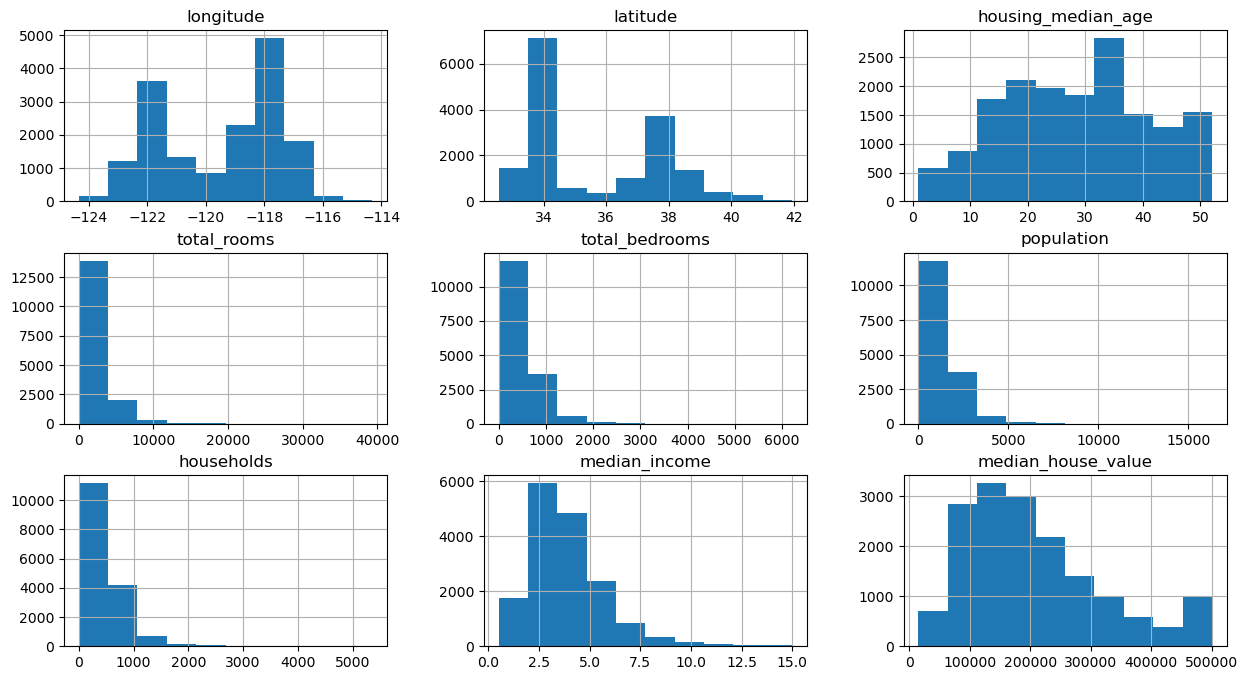

In [19]:
train_data.hist(figsize=(15,8))

# Data Pre-processing

In [21]:
train_data.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924653           -0.116796     0.051962   
latitude            -0.924653  1.000000            0.017665    -0.040854   
housing_median_age  -0.116796  0.017665            1.000000    -0.361230   
total_rooms          0.051962 -0.040854           -0.361230     1.000000   
total_bedrooms       0.076083 -0.070795           -0.321415     0.929408   
population           0.107707 -0.114713           -0.303742     0.864318   
households           0.062992 -0.076413           -0.303463     0.917586   
median_income       -0.009604 -0.085313           -0.121464     0.198210   
median_house_value  -0.043038 -0.147133            0.105505     0.131235   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076083    0.107707    0.062992      -0.009604   
latitude                 -0.070795   -0.114713   -0.076413      -0.085313   
housing_median_age       -0.321415   -0.303742   -0.303463      -0.121464   
total_rooms               0.929408    0.864318    0.917586       0.198210   
total_bedrooms            1.000000    0.884283    0.978628      -0.008365   
population                0.884283    1.000000    0.914802       0.009331   
households                0.978628    0.914802    1.000000       0.013576   
median_income            -0.008365    0.009331    0.013576       1.000000   
median_house_value        0.047265   -0.024851    0.063882       0.687719   

                    median_house_value  
longitude                    -0.043038  
latitude                     -0.147133  
housing_median_age            0.105505  
total_rooms                   0.131235  
total_bedrooms                0.047265  
population                   -0.024851  
households                    0.063882  
median_income                 0.687719  
median_house_value            1.000000

<AxesSubplot:>

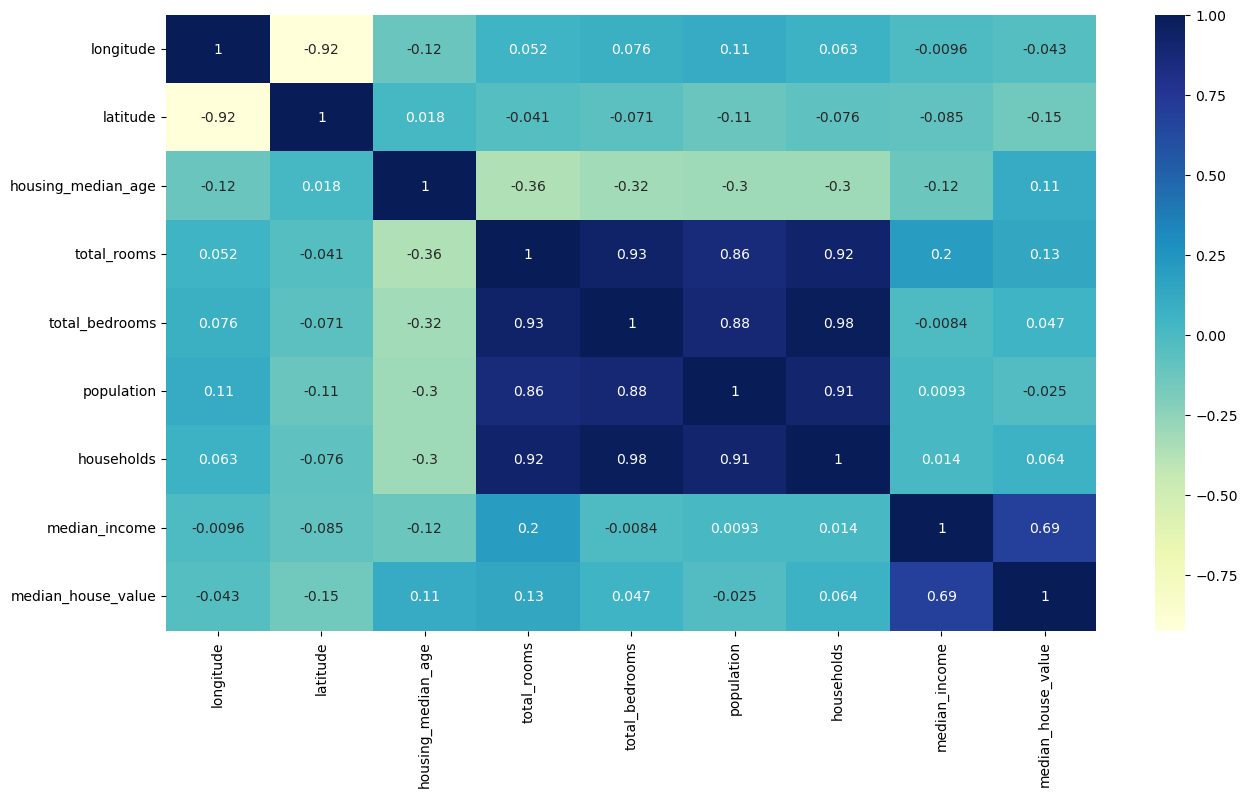

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [26]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

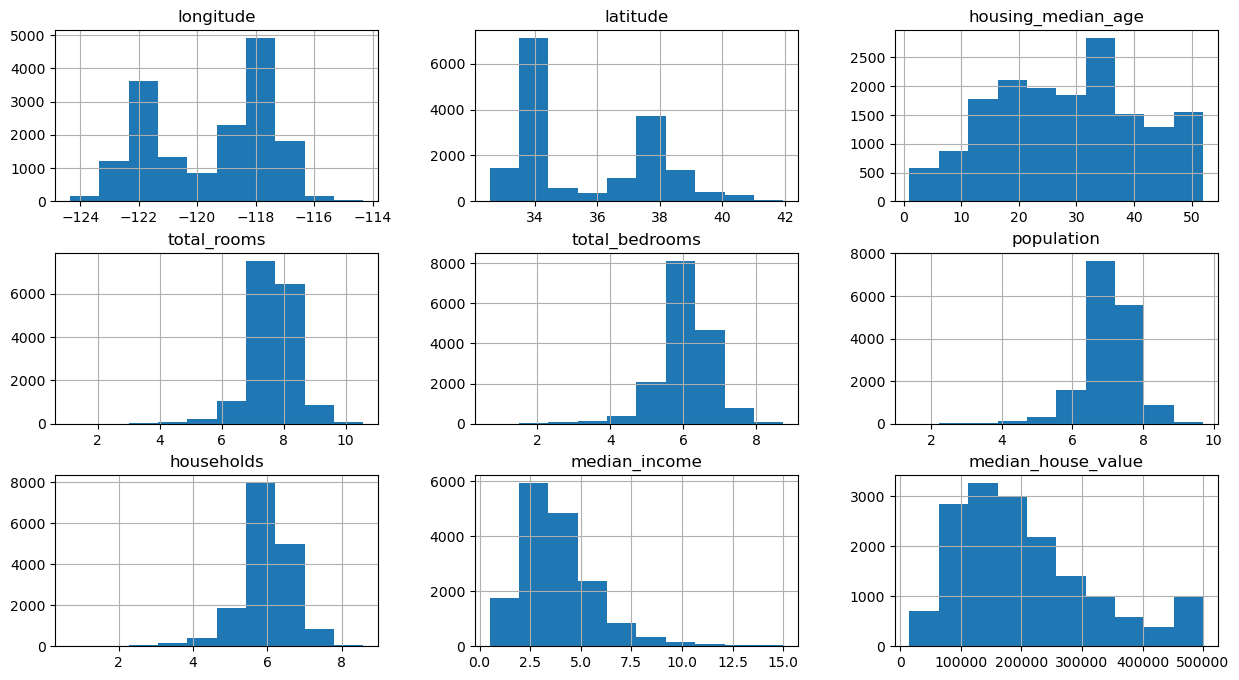

In [27]:
train_data.hist(figsize=(15,8))

In [33]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [34]:
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1446     -122.00     37.98                35.0     7.084226        5.308268   
2860     -118.90     35.41                 6.0     8.446127        6.879356   
14532    -117.13     32.94                15.0     8.486115        6.716595   
19662    -120.85     37.50                52.0     7.452982        5.866468   
16163    -122.50     37.77                52.0     7.478735        6.028279   
...          ...       ...                 ...          ...             ...   
5089     -118.29     33.98                30.0     7.058758        5.765191   
19562    -120.96     37.59                11.0     8.351611        6.779922   
15133    -116.93     32.83                21.0     7.157735        5.631212   
19799    -123.21     40.51                16.0     5.488938        4.442651   
3165     -118.85     35.20                17.0     7.931644        6.520621   

       population  households  median_income  median_house_value  <1H OCEAN  \
1446     6.284134    5.153292         4.9219            182000.0          0   
2860     7.749753    6.841615         3.0938            100800.0          0   
14532    7.936660    6.714171         4.9375            180400.0          1   
19662    6.827629    5.855072         1.7227             85700.0          0   
16163    6.940222    5.942799         3.9954            324700.0          0   
...           ...         ...            ...                 ...        ...   
5089     7.096721    5.669881         1.2230            100000.0          1   
19562    7.787797    6.746412         2.3849            122000.0          0   
15133    6.529419    5.669881         2.3203            163500.0          1   
19799    5.030438    4.127134         1.3750             48800.0          0   
3165     7.850493    6.464588         1.9907             51200.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
1446        1       0         0           0  
2860        1       0         0           0  
14532       0       0         0           0  
19662       1       0         0           0  
16163       0       0         1           0  
...       ...     ...       ...         ...  
5089        0       0         0           0  
19562       1       0         0           0  
15133       0       0         0           0  
19799       1       0         0           0  
3165        1       0         0           0  

[16346 rows x 14 columns]

<AxesSubplot:>

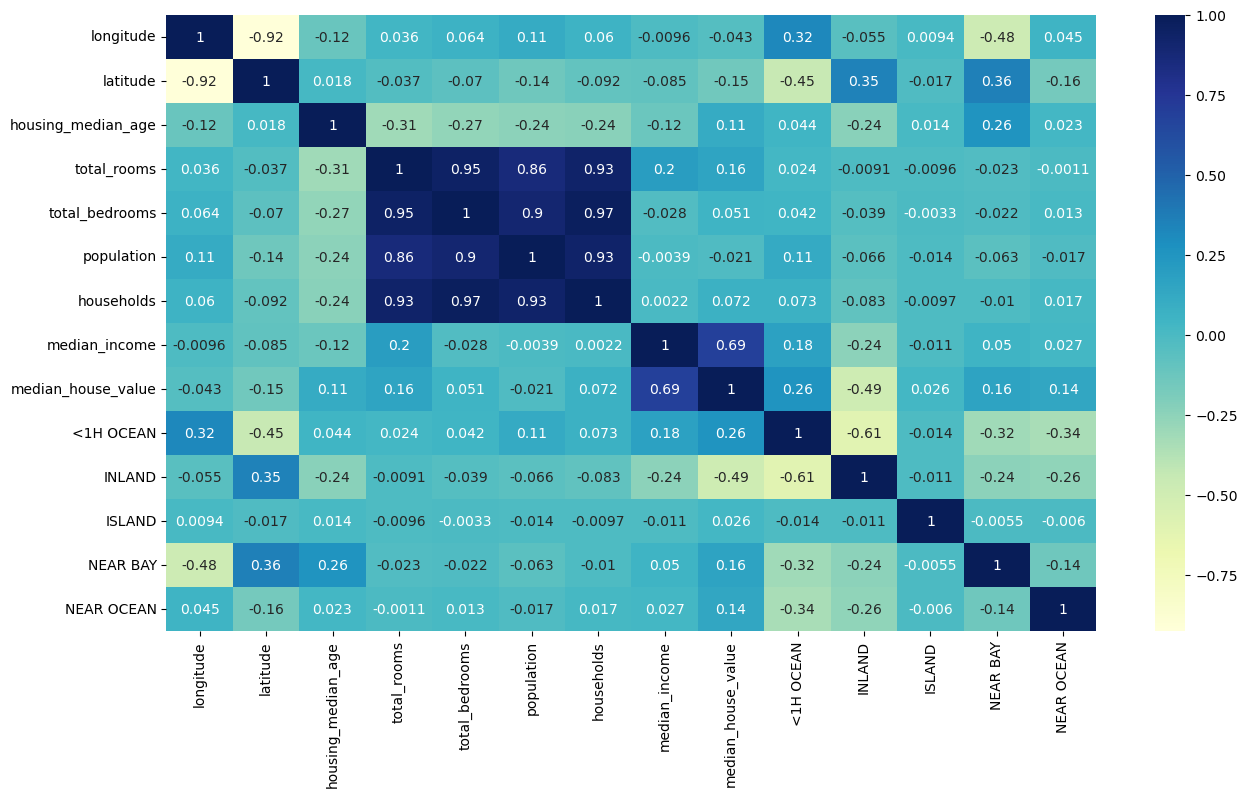

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

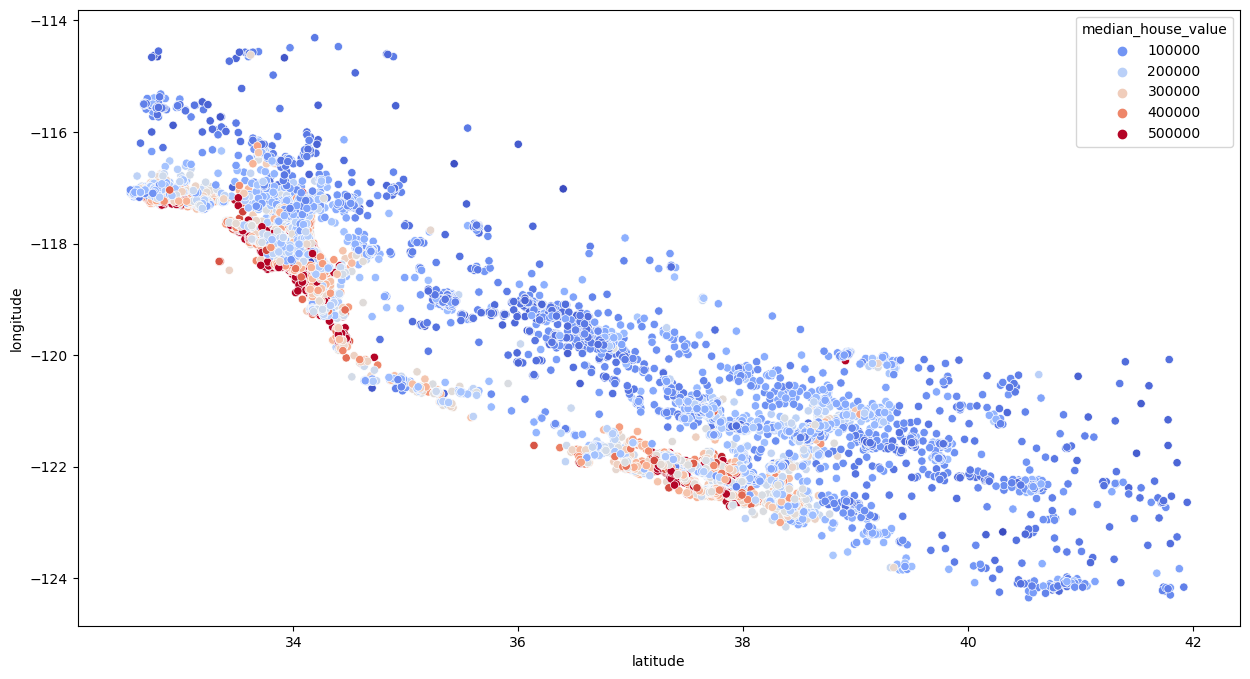

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [39]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<AxesSubplot:>

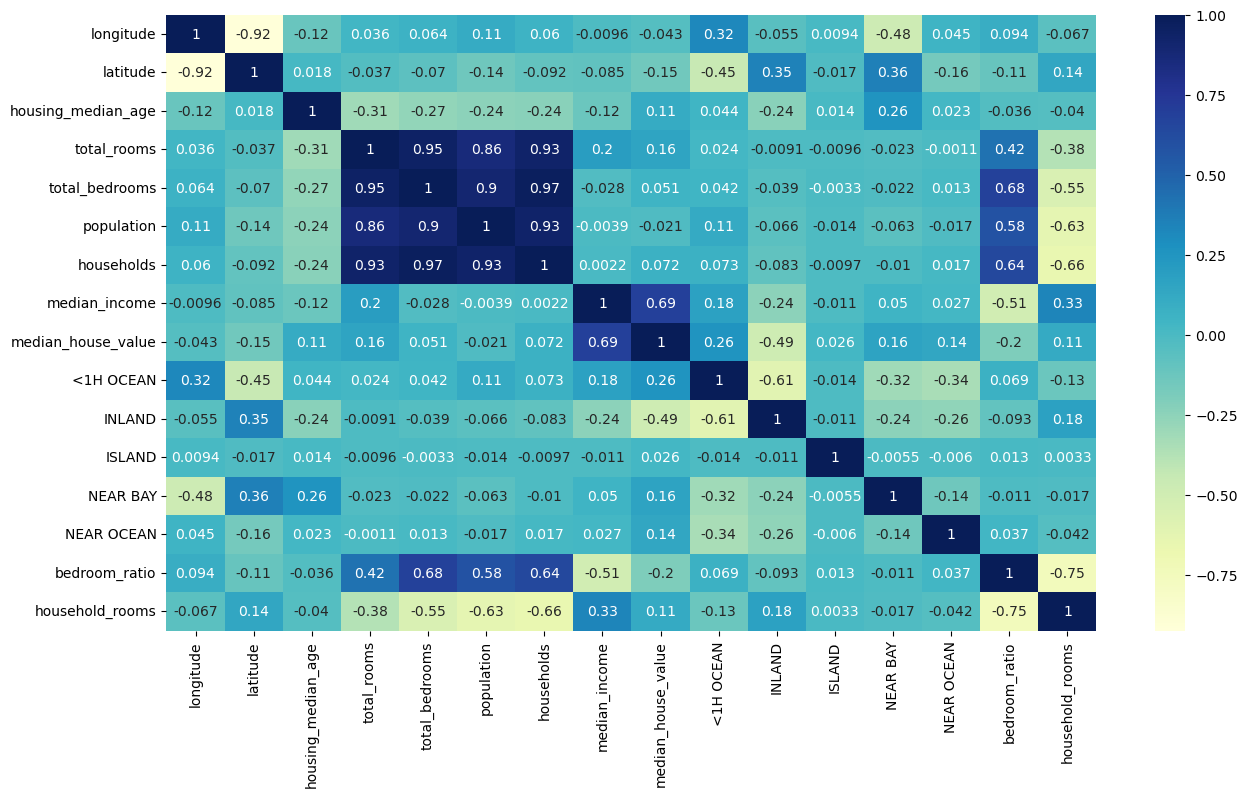

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# Training the Model

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [44]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [45]:
test_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5444     -118.43     34.00                30.0     7.672758        6.393591   
6810     -118.10     34.10                34.0     7.855157        6.470800   
14184    -117.08     32.70                35.0     7.298445        5.579730   
8496     -118.30     33.89                37.0     7.665285        6.338594   
12735    -121.34     38.59                23.0     7.976939        6.045005   
...          ...       ...                 ...          ...             ...   
17457    -120.44     34.68                 6.0     7.690743        5.627621   
18793    -122.66     40.52                13.0     8.011023        6.188264   
6122     -117.92     34.12                32.0     7.845024        6.357842   
11752    -121.21     38.76                16.0     7.383368        5.693732   
202      -122.23     37.78                43.0     7.259116        6.159095   

       population  households  median_income  median_house_value  <1H OCEAN  \
5444     7.201916    6.327937         3.3995            324000.0          1   
6810     7.395722    6.426488         2.3400            210900.0          1   
14184    6.748760    5.634790         3.1786            100600.0          0   
8496     7.222566    6.338594         3.2850            218100.0          1   
12735    7.032624    6.018593         5.9174            225900.0          0   
...           ...         ...            ...                 ...        ...   
17457    6.548219    5.613128         6.2685            307400.0          0   
18793    7.216709    6.246107         4.5357            171200.0          0   
6122     7.678789    6.308098         2.9459            144400.0          1   
11752    6.675823    5.659482         3.1583            239200.0          0   
202      7.317876    6.084499         1.9338            112500.0          0   

       INLAND  ISLAND  NEAR BAY  NEAR OCEAN  bedroom_ratio  household_rooms  
5444        0       0         0           0       0.833285         1.212521  
6810        0       0         0           0       0.823765         1.222309  
14184       0       0         0           1       0.764509         1.295247  
8496        0       0         0           0       0.826922         1.209304  
12735       1       0         0           0       0.757810         1.325383  
...       ...     ...       ...         ...            ...              ...  
17457       0       0         0           1       0.731740         1.370135  
18793       1       0         0           0       0.772469         1.282563  
6122        0       0         0           0       0.810430         1.243643  
11752       1       0         0           0       0.771156         1.304601  
202         0       0         1           0       0.848464         1.193051  

[4087 rows x 16 columns]

In [46]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [52]:
X_test_s = scaler.transform(X_test)

In [53]:
reg.score(X_test, Y_test)

0.6767398250375976

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [60]:
forest.score(X_test_s, Y_test)

0.817721988995401

In [61]:
from sklearn.model_selection import GridSearchCV

In [ ]:
forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2,4],
    "max_depth": [None,4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_train_s, Y_train)

In [ ]:
grid_search.best_estimator_